<a href="https://colab.research.google.com/github/singh06-08/Regression--Analysis/blob/main/Capstone_project_2_SeoulBikeData(Regression_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#importing various libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_log_error
from scipy.stats import zscore
from sklearn.metrics import roc_auc_score, accuracy_score

In [ ]:
#drive mounting
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#reading csv file
dataset = pd.read_csv('/content/drive/MyDrive/Copy of BikeData.csv', encoding= 'unicode_escape')

In [ ]:
dataset.head

<bound method NDFrame.head of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  

In [ ]:
#shape of dataset
dataset.shape

(8760, 14)

In [ ]:
#checking for null values and data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#checking if any missing values in dataset
dataset.isnull()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#looking for any missing values in each column
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#data description
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#reading all columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

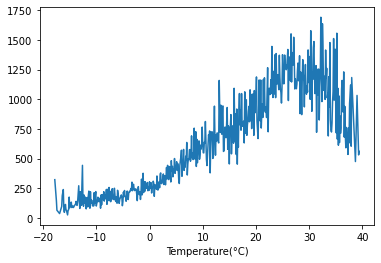

In [ ]:
#print the plot to analyze the relation between Temperature(°C) and Rented Bike Count
dataset.groupby('Temperature(°C)' ).mean()['Rented Bike Count'].plot()

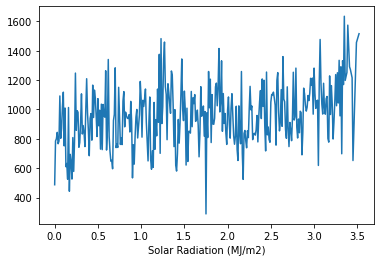

In [ ]:
#print the plot to analyze the relation between Solar Radiation (MJ/m2) and Rented Bike Count
dataset.groupby('Solar Radiation (MJ/m2)' ).mean()['Rented Bike Count'].plot()

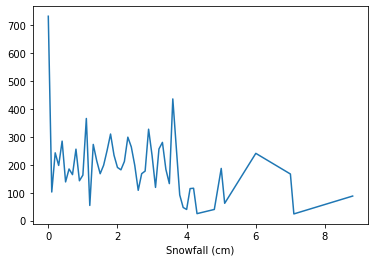

In [ ]:
#print the plot to analyze the relation between Snowfall (cm) and Rented Bike Count
dataset.groupby('Snowfall (cm)' ).mean()['Rented Bike Count'].plot()

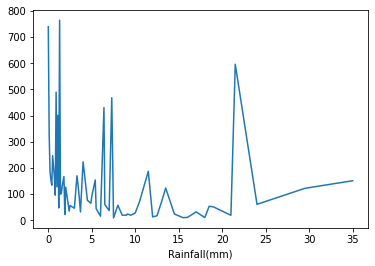

In [ ]:
#print the plot to analyze the relation between Rainfall(mm) and Rented Bike Count
dataset.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

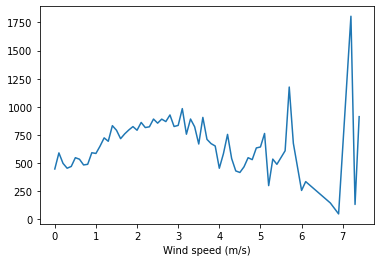

In [ ]:
#print the plot to analyze the relation between Wind speed (m/s) and Rented Bike Count
dataset.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot()

In [ ]:
numerical_features= ('Rainfall(mm)','Snowfall (cm)','Temperature(°C)','Humidity(%)','Wind speed (m/s)')

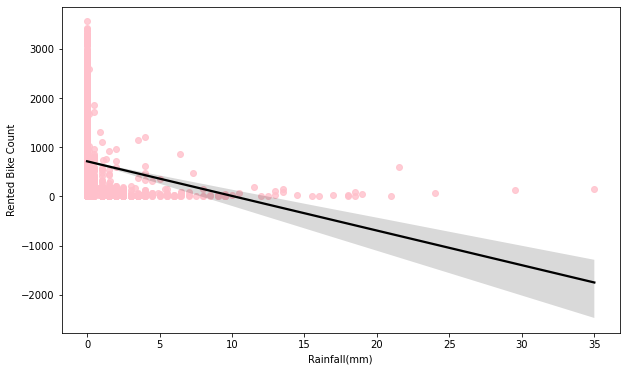

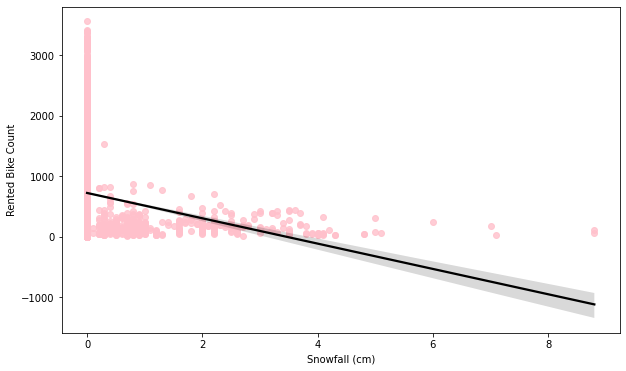

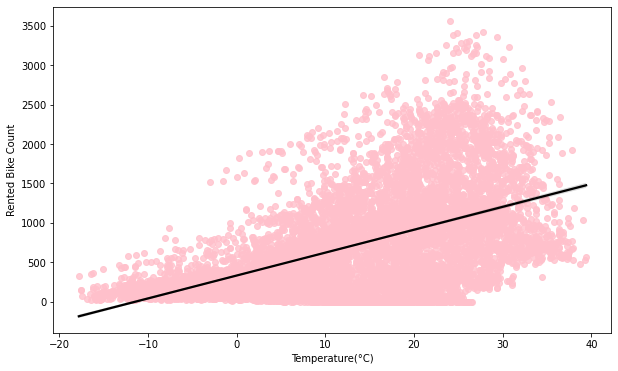

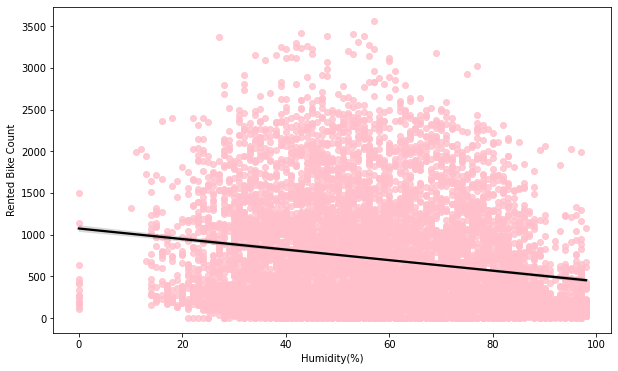

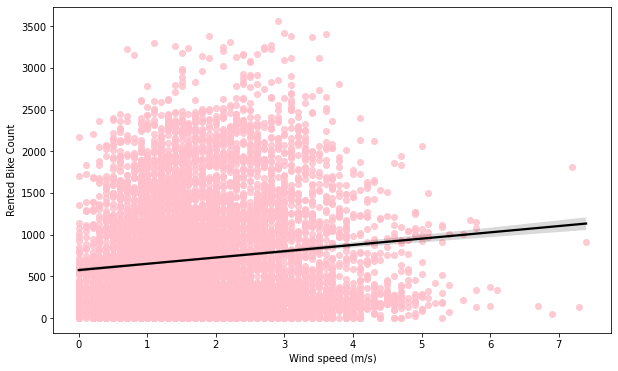

In [ ]:
#print regression plot for numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=dataset[col],y=dataset['Rented Bike Count'],scatter_kws={"color":"pink"},line_kws={"color":"black"})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


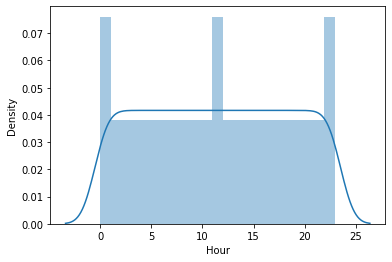

In [ ]:
plt.figure()
sns.distplot(dataset['Hour'])


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


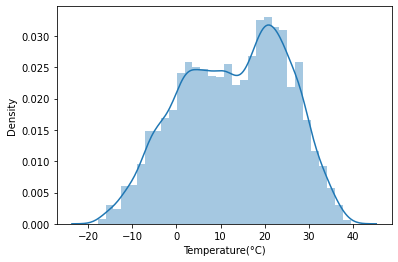

In [ ]:
plt.figure()
sns.distplot(dataset['Temperature(°C)'])
plt.savefig('count.jpg')


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


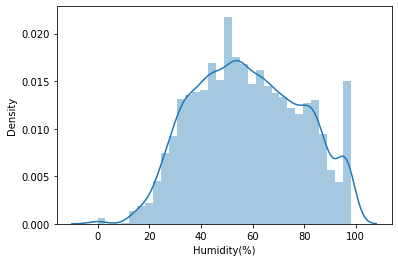

In [ ]:
plt.figure()
sns.distplot(dataset['Humidity(%)'])


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


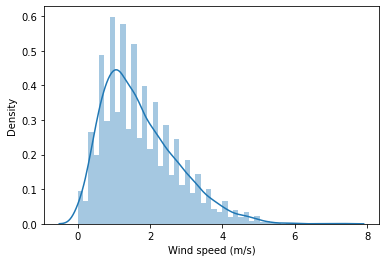

In [ ]:
plt.figure()
sns.distplot(dataset['Wind speed (m/s)'])



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


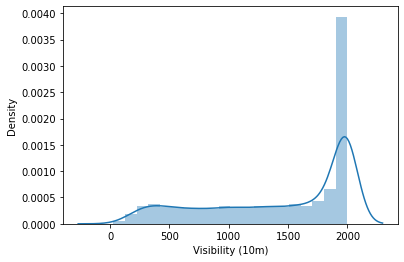

In [ ]:
plt.figure()
sns.distplot(dataset['Visibility (10m)'])


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


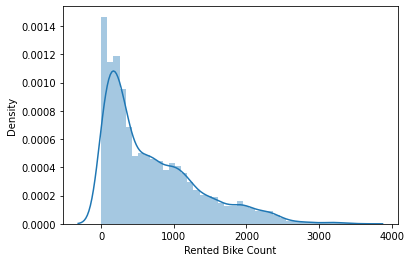

In [ ]:
#checking for skewness because Rented Bike Count is our target variable
plt.figure()
sns.distplot(dataset['Rented Bike Count'])





/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


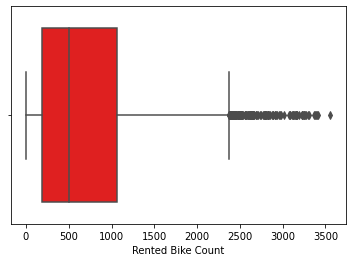

In [ ]:
#checking outliers using boxplot
plt.figure
sns.boxplot(dataset['Rented Bike Count'],color='red')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


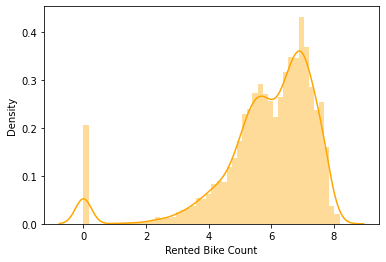

In [ ]:
#performing log transformation because dataset is right skewed
plt.figure()
sns.distplot(np.log1p(dataset['Rented Bike Count']),color='orange')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


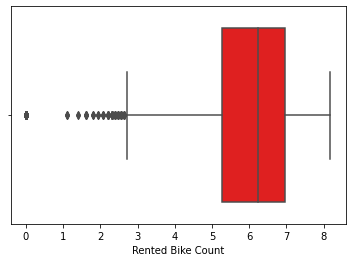

In [ ]:
#Again checking for outliers after log transformation using boxplot
plt.figure()
sns.boxplot(np.log1p(dataset['Rented Bike Count']),color='red')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


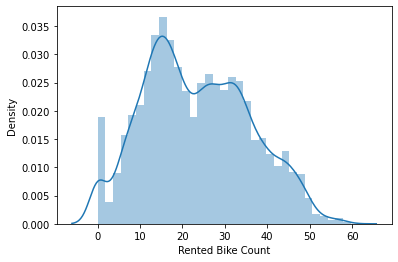

In [ ]:
#Using square root transformation to treat skewness 
plt.figure()
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
sns.distplot(np.sqrt(dataset['Rented Bike Count']))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


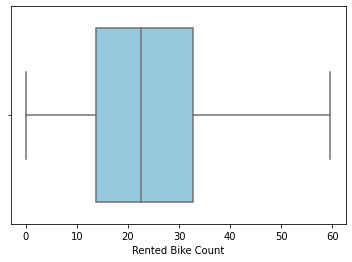

In [ ]:
#using boxplot method to check if any outliers still there after square root transformation
plt.figure()
sns.boxplot(np.sqrt(dataset['Rented Bike Count']),color='skyblue')

In [ ]:
dataset.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


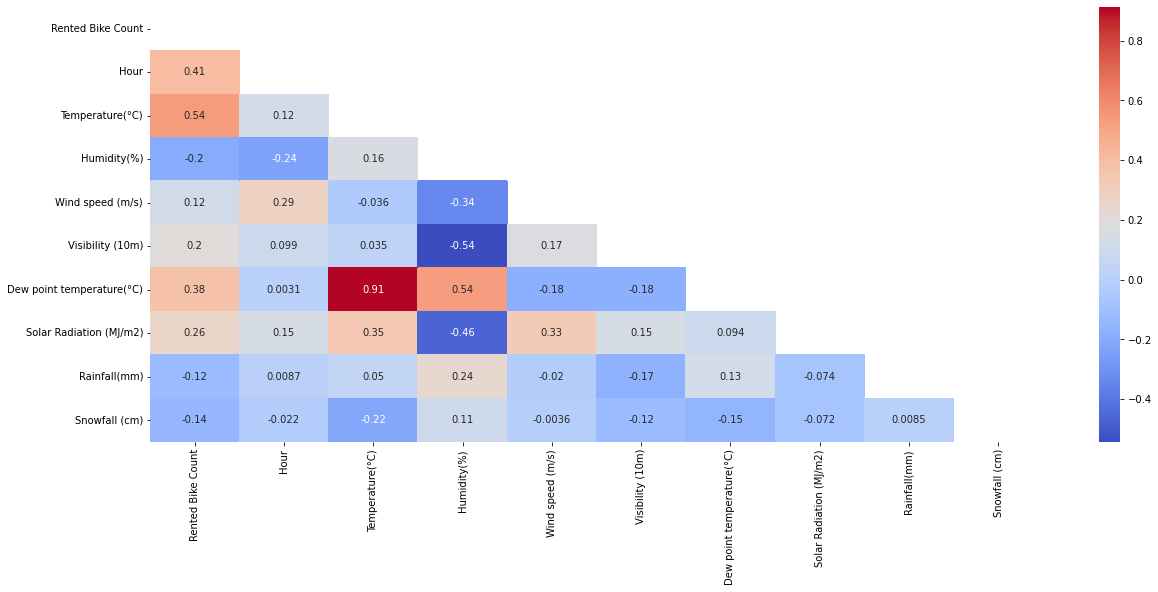

In [ ]:
#correlation between variables using heatmap
plt.figure(figsize=(20,8))
correlation=dataset.corr()
mask=np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask,annot=True,cmap='coolwarm')

In [ ]:
#dropping highly correlated column
dataset=dataset.drop(['Dew point temperature(°C)'],axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     8760 non-null   object 
 1   Rented Bike Count        8760 non-null   int64  
 2   Hour                     8760 non-null   int64  
 3   Temperature(°C)          8760 non-null   float64
 4   Humidity(%)              8760 non-null   int64  
 5   Wind speed (m/s)         8760 non-null   float64
 6   Visibility (10m)         8760 non-null   int64  
 7   Solar Radiation (MJ/m2)  8760 non-null   float64
 8   Rainfall(mm)             8760 non-null   float64
 9   Snowfall (cm)            8760 non-null   float64
 10  Seasons                  8760 non-null   object 
 11  Holiday                  8760 non-null   object 
 12  Functioning Day          8760 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 889.8+ KB


In [ ]:
dataset_copy=dataset

In [ ]:
x= dataset_copy.drop(columns=['Rented Bike Count'],axis=1)
y=np.sqrt(dataset_copy['Rented Bike Count'])

In [ ]:
x.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [ ]:
# one hot encoding
dataset_copy=dataset
def one_hot_encoding(data,column):
  data=pd.concat([data,pd.get_dummies])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)

(6570, 12)
(2190, 12)


In [ ]:
categorical_features=list(dataset.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [ ]:
dataset_copy=dataset
def one_hot_encoding(data,column):
  data=pd.concat([data,pd.get_dummies(data[column],prefix=column,drop_first=True)],axis=1)
  data=data.drop([column],axis=1)
  return data

for col in categorical_features:
  dataset_copy=one_hot_encoding(dataset_copy,col)
  dataset_copy.head()

In [ ]:
x=dataset_copy.drop(columns=['Rented Bike Count'],axis=1)
y=np.sqrt(dataset_copy['Rented Bike Count'])

In [ ]:
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Date_01/02/2018,Date_01/03/2018,...,Date_31/05/2018,Date_31/07/2018,Date_31/08/2018,Date_31/10/2018,Date_31/12/2017,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)

(6570, 377)
(2190, 377)


In [ ]:
dataset_copy.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Date_01/02/2018',
       ...
       'Date_31/05/2018', 'Date_31/07/2018', 'Date_31/08/2018',
       'Date_31/10/2018', 'Date_31/12/2017', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_Yes'],
      dtype='object', length=378)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,y_train)

In [ ]:
#calculating regression score
reg.score(x_train,y_train)

0.7606886119908367

In [ ]:
#implementing Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)

In [ ]:
lasso.fit(x_train,y_train)

Lasso()

In [ ]:
y_pred=lasso.predict(x_test) 

In [ ]:
y_pred 

array([16.95936563, 21.99133358, 19.96588063, ..., 38.36103528,
       25.87348268, 35.72562254])

In [ ]:
#calculating mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

86.82231915668942

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

9.317849492060356

In [ ]:
#calculating Rsquare 
print("Rsquared:%2f" % lasso.score(x_test,y_test))

Rsquared:0.450375


In [ ]:
#Implementing Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1.0)

In [ ]:
ridge.fit(x_train,y_train)

Ridge()

In [ ]:
y_pred=lasso.predict(x_test) 

In [ ]:
y_pred

array([16.95936563, 21.99133358, 19.96588063, ..., 38.36103528,
       25.87348268, 35.72562254])

In [ ]:
#calculating mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

86.82231915668942

In [ ]:
#calculate Rsquared
print("Rsquared:%2f" % ridge.score(x_test,y_test))

Rsquared:0.732848


In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

9.317849492060356

In [ ]:
#Implementing ElasticNet Regression
from sklearn.linear_model import ElasticNet
enet=ElasticNet(alpha=1.0,l1_ratio=0.5)

In [ ]:
enet.fit(x_train,y_train)

ElasticNet()

In [ ]:
y_pred=enet.predict(x_test)
y_pred

array([16.92077068, 21.9688883 , 20.01311599, ..., 38.45997862,
       25.35926084, 35.78702135])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

85.58155949873475

In [ ]:
print("Rsquared:%2f" % ridge.score(x_test,y_test))

Rsquared:0.732848


In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

9.251030185808213

In [ ]:
#Implementing DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(criterion="mse",
                          max_depth=10,
                          min_samples_split=10,
                          random_state=5)

In [ ]:
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=reg.predict(x_test) 

In [ ]:
y_pred

array([16.92077068, 21.9688883 , 20.01311599, ..., 38.45997862,
       25.35926084, 35.78702135])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

85.58155949873475

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

9.251030185808213

In [ ]:
#Implementing CrossValidation
from sklearn.model_selection import cross_val_score
cross_val_score(reg,x_train,y_train,cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

array([0.85858473, 0.83802014, 0.86336435, 0.84995168, 0.83743899,
       0.86561386, 0.86750459, 0.83647552, 0.82647416, 0.86927338])